# Basic Agent

Does three arimethic operations:
- multiply
- add
- divide

In [11]:
from langgraph.graph import StateGraph, START, END, MessagesState
from langchain_core.messages import SystemMessage
from langchain_core.tools import tool

def multiply(a, b):
  """Multiply a and b.

  Args:
      a: first int
      b: second int
  """
  return a * b

def add(a, b):
  """Add a and b.

  Args:
      a: first int
      b: second int
  """
  return a + b

def divide(a, b):
  """Divide a by b.

  Args:
      a: first int
      b: second int
  """
  return a / b

assistant_message = SystemMessage(content="You are a helpful assistant tasked with performing arithmetic on a set of inputs.")

# node to add context for the tool calls
def assistant_node(state: MessagesState):
  return {"messages": [assistant_message + state["messages"]]}

For add the tools we need to use the llm the tools is not directly apply on the graph by himself

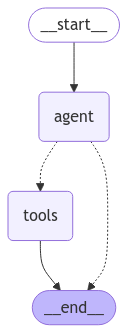

In [16]:
from langchain_openai import ChatOpenAI
from langgraph.prebuilt import ToolNode, tools_condition
from IPython.display import Image


#instance the llm and add the tools
#llm = ChatOpenAI(model="gpt-4o-mini")
tools = [multiply, add, divide]
#llm_with_tools = llm.bind_tools(tools)


#create the graph
graph_builder = StateGraph(MessagesState)

graph_builder.add_node("agent", assistant_node)
graph_builder.add_node("tools", ToolNode(tools))


graph_builder.add_edge(START, "agent")
graph_builder.add_conditional_edges("agent", tools_condition)
graph_builder.add_edge("tools", END)

graph = graph_builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

#graph.invoke({"messages": []})